## 라이브러리(패키지) import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
ExampleData = pd.read_csv('./ExampleData.csv', sep=',', header=None)
ExampleData

,0,1,2,3
0,0.000000,0.016440,-0.014200,0.001433
1,0.000078,0.013822,-0.015707,0.001504
2,0.000156,0.019431,-0.016963,0.001433
3,0.000234,0.003726,-0.017248,0.001549
4,0.000313,0.022049,-0.009840,0.001864
...,...,...,...,...
2769,0.216330,0.077392,0.002404,0.003453
2770,0.216410,0.030276,0.003952,0.003498
2771,0.216480,0.017188,0.005504,0.003397
2772,0.216560,0.037754,-0.000108,0.003506


## 대표값 추출하기

In [3]:
def rms(a): #rms 함수 정의
    return np.sqrt(np.mean(a**2))

In [4]:
# 예시: x 방향 가속도 데이터 대표값

Max  = np.max(ExampleData.iloc[:,1])
Min  = np.min(ExampleData.iloc[:,1])
RMS  =    rms(ExampleData.iloc[:,1])
Var  = np.var(ExampleData.iloc[:,1])
Std  = np.std(ExampleData.iloc[:,1])
Mean = np.mean(ExampleData.iloc[:,1])

Rep_values = np.array([Max, Min, RMS, Var, Std, Mean])
Rep_values

array([ 1.351     , -1.372     ,  0.42610508,  0.18144271,  0.42596093,
        0.01108281])

In [5]:
# for 구문 이용하여 각센서 대표값 추출하기

Rep_Values = np.zeros((6 , ExampleData.shape[1]))
for i in range(ExampleData.shape[1]-1):
    
    Rep_Values[0,i] = np.max(ExampleData.iloc[:,i+1])
    Rep_Values[1,i] = np.min(ExampleData.iloc[:,i+1])
    Rep_Values[2,i] =    rms(ExampleData.iloc[:,i+1])
    Rep_Values[3,i] = np.var(ExampleData.iloc[:,i+1])
    Rep_Values[4,i] = np.std(ExampleData.iloc[:,i+1])
    Rep_Values[5,i] = np.mean(ExampleData.iloc[:,i+1])
    
Rep_Values

array([[ 1.35100000e+00,  3.01170000e+00,  5.21530000e+00,
         0.00000000e+00],
       [-1.37200000e+00, -2.71730000e+00, -5.24510000e+00,
         0.00000000e+00],
       [ 4.26105083e-01,  1.30590451e+00,  2.73907307e+00,
         0.00000000e+00],
       [ 1.81442713e-01,  1.70533197e+00,  7.50204150e+00,
         0.00000000e+00],
       [ 4.25960929e-01,  1.30588360e+00,  2.73898549e+00,
         0.00000000e+00],
       [ 1.10828100e-02,  7.39091967e-03, -2.19042693e-02,
         0.00000000e+00]])

In [6]:
# for 구문 이용하여 각센서 데이터의 0.01초(128/12800)마다 RMS값 변화 확인

RMS_Values = np.zeros((21 , ExampleData.shape[1]-1)) # 데이터 수집 시간 약 0.21

for i in range(ExampleData.shape[1]-1):
    for j in range(21):
     
        RMS_Values[j,i] = rms(ExampleData.iloc[128*(j):128*(j+1),i+1])
        
RMS_Values

array([[0.29158983, 1.00853763, 0.65063047],
       [0.42523761, 1.31532409, 1.66163614],
       [0.35149449, 1.05880481, 2.27618175],
       [0.33475048, 1.26983073, 2.46409144],
       [0.36131495, 1.25512839, 2.47476446],
       [0.57709404, 1.56214557, 2.72136135],
       [0.65731289, 1.65986049, 3.29897007],
       [0.65821738, 1.40900878, 3.08762342],
       [0.49882991, 1.31367303, 2.63260929],
       [0.47261358, 1.28643958, 2.64829859],
       [0.50942992, 1.49557613, 2.77551703],
       [0.46797905, 1.52138878, 3.34168361],
       [0.48814496, 1.27245955, 3.11989565],
       [0.37131391, 1.21091481, 2.67070891],
       [0.34769219, 1.17879273, 2.67441739],
       [0.37270364, 1.39139488, 2.81123565],
       [0.32978721, 1.3882214 , 3.3269702 ],
       [0.34838909, 1.16530372, 3.08059018],
       [0.28102132, 1.15834622, 2.70575468],
       [0.27278696, 1.12969312, 2.69910147],
       [0.29674982, 1.31812284, 2.76512439]])

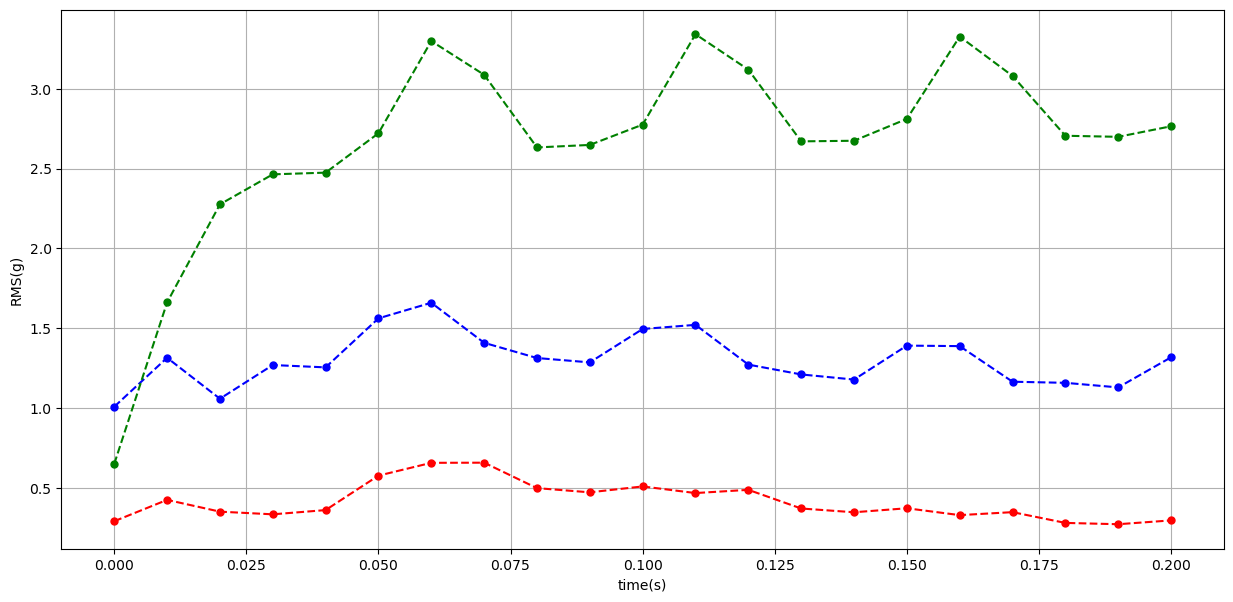

In [7]:
# 그래프
TimeforPlot = np.arange(0, 0.21, 0.01) #시간열 생성 (0.21 ≒ 2774 / 12800, 0.01 = 128 / 12800)

plt.figure(figsize=(15,7))

plt.plot(TimeforPlot, RMS_Values[:,0], ls = '--', c = 'r', marker = 'o', ms = 5, mfc = 'r', mec = 'r')
plt.plot(TimeforPlot, RMS_Values[:,1], ls = '--', c = 'b', marker = 'o', ms = 5, mfc = 'b', mec = 'b')
plt.plot(TimeforPlot, RMS_Values[:,2], ls = '--', c = 'g', marker = 'o', ms = 5, mfc = 'g', mec = 'g')

plt.grid()
plt.xlabel('time(s)')
plt.ylabel('RMS(g)')

plt.show()